In [1]:
import numpy as np
import xarray as xr
import sys
sys.path.insert(1, '/home/a/a270230/LKF/lkf_tools/lkf_tools/')
from dataset import *
sys.path.insert(1, '/home/a/a270230/LKF/lkf_detection/functions/')
from statistics_functions import *
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20})
import cartopy.crs as ccrs
import cmocean
import warnings
warnings.filterwarnings('ignore')

In [2]:
res = '1km'

path = '/work/bk1377/a270230/'
path_ds   = path + f'datasets/{res}/'
path_nc   = path + f'interpolated_fesom_output/'
path_imgs = path + 'imgs/'

In [3]:
year = 2015

In [4]:
file = xr.open_dataset(path_nc + f'{year}_{res}_monthly.nc')
line = ( (((file.ULON > -120) & (file.ULON < 100)) & (file.ULAT >= 79.9) & (file.ULAT <= 80))
        | (((file.ULON > -120.5) & (file.ULON <= -120)) & (file.ULAT >= 70) & (file.ULAT < 80))
        | (((file.ULON < 100.5) & (file.ULON >= 100)) & (file.ULAT >= 70) & (file.ULAT < 80))
        | ((file.ULON <= -120) & (file.ULAT >= 69.9) & (file.ULAT <= 70)  )
        | ((file.ULON >= 100) & (file.ULAT >= 69.9) & (file.ULAT <= 70))
       )
line = np.where(line==1,1,np.nan)

lkf_data = np.load(path_ds + f'ds_{year}_{res}.npy', allow_pickle=True)[0]

if res == '1km': z = 70*4
if res == '4km': z = 70
# arctic basin
a = max([0,lkf_data.index_y[0][0]-1])
b = lkf_data.index_y[0][-1]+2
c = max([0,lkf_data.index_x[0][0]-1])
d = lkf_data.index_x[0][-1]+2 - z
e = lkf_data.red_fac

lon = lkf_data.lon[a:b:e,c:d:e]
lat = lkf_data.lat[a:b:e,c:d:e]

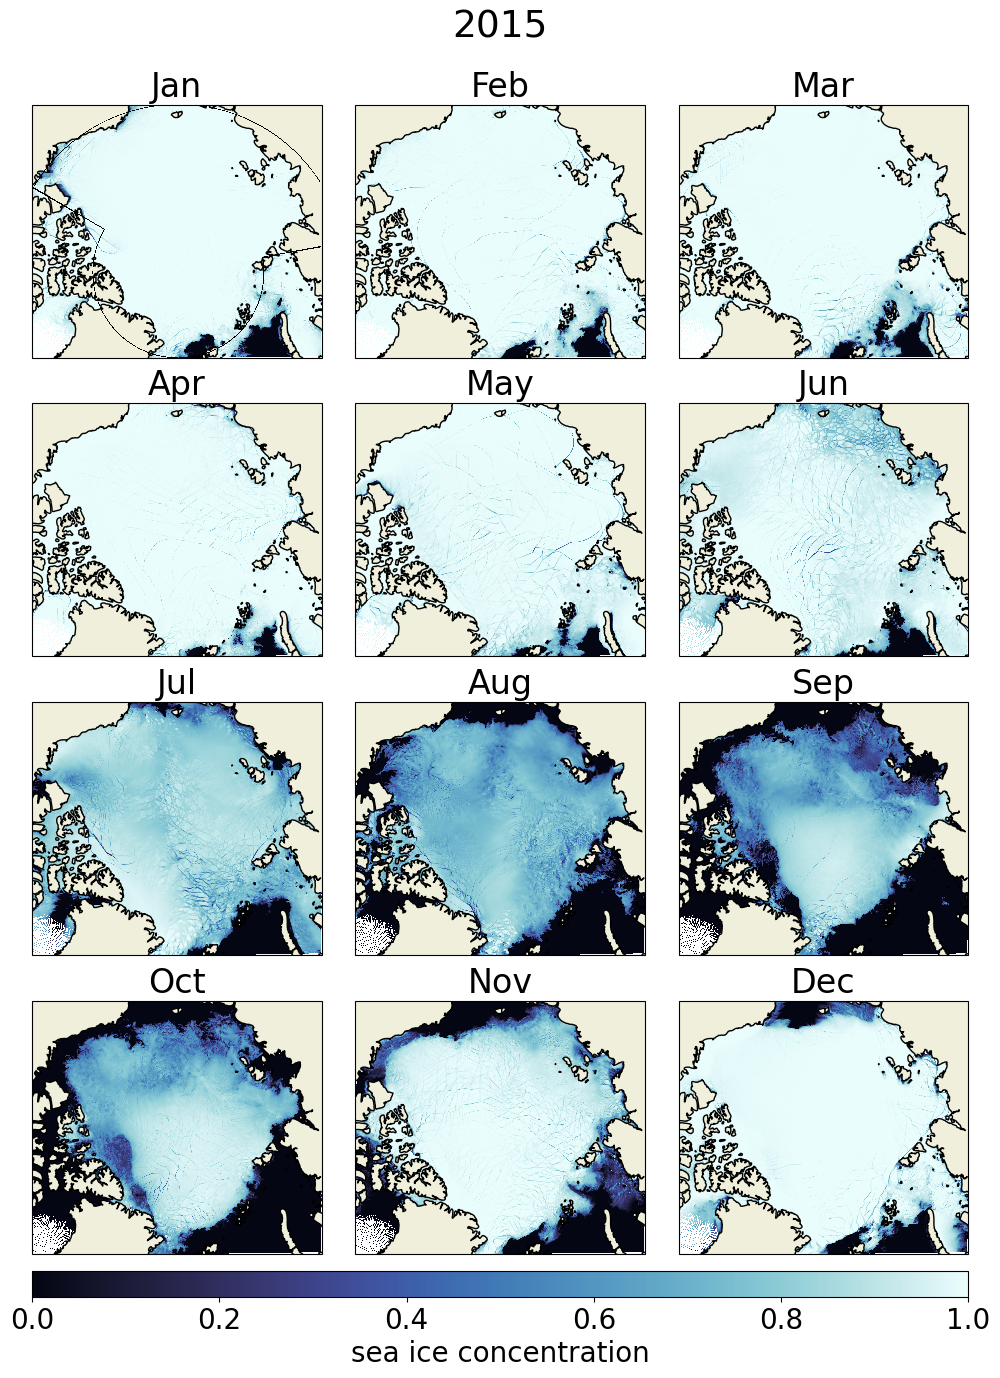

In [5]:
times = np.arange(12)
#days = np.append([0], xticks) # use this for nc files with daily data 

fig = plt.figure(figsize=[10, 13])
axs = [fig.add_subplot(4,3,i, projection=ccrs.Orthographic(0, 90)) for i in range(1,13)]

for ax, i, title in zip(axs, times, xticks_labels):

    ax.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='black')
    im = ax.pcolormesh(lon, lat, file.A.isel(time=i)[a:b,c:d],
                       cmap = cmocean.cm.ice, vmin=0, vmax=1,
                       transform=ccrs.PlateCarree())
    
    ax.set_title(title)

axs[0].pcolormesh(lon, lat, line[a:b,c:d], transform = ccrs.PlateCarree(),
                  cmap = 'Greys', vmin=-1, vmax=0, zorder=3)

fig.suptitle(f'{year}', fontsize=27)
fig.tight_layout()

p0 = axs[-3].get_position().get_points().flatten()
p1 = axs[-1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], -0.01, p1[2]-p0[0], 0.02])
cbar = plt.colorbar(im,label='sea ice concentration', cax=ax_cbar, orientation='horizontal')
#plt.savefig(path_imgs + f'ice_{year}.png', dpi=100, bbox_inches='tight')